# Adaptive.jl 
a wrapper to a python adaptive package https://github.com/python-adaptive/adaptive

In [1]:
using Distributed
addprocs(2)

using Adaptive
using TaskMaster
using PyPlot

## AdaptiveLearner1D 

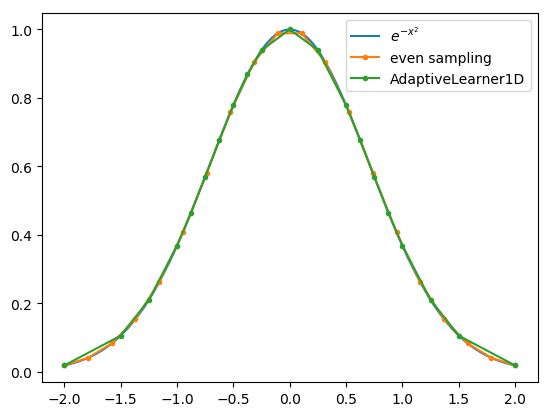

xi=-2 yi=0.01831563888873418
xi=2 yi=0.01831563888873418
xi=0.0 yi=1.0
xi=1.0 yi=0.36787944117144233
xi=0.5 yi=0.7788007830714049
xi=-1.0 yi=0.36787944117144233
xi=-1.5 yi=0.10539922456186433
xi=-0.5 yi=0.7788007830714049
xi=0.75 yi=0.569782824730923
xi=-0.75 yi=0.569782824730923
xi=1.5 yi=0.10539922456186433
xi=-1.25 yi=0.20961138715109784
xi=1.25 yi=0.20961138715109784
xi=-0.25 yi=0.9394130628134758
xi=0.25 yi=0.9394130628134758
xi=-0.625 yi=0.676633846161729
xi=0.625 yi=0.676633846161729
xi=-0.875 yi=0.4650431881340563
xi=0.875 yi=0.4650431881340563
xi=-0.375 yi=0.8688150562628432


In [4]:
@everywhere f(x) = exp(-x^2)

fig = figure()

x = collect(range(-2,stop=2,length=200))
plot(x,f.(x),label=L"e^{-x^2}")

xx = collect(range(-2,stop=2,length=20))
plot(xx,f.(xx),".-",label="even sampling")

learner = AdaptiveLearner1D((-2,+2))
evaluate(f,learner,learner->length(learner.data)+length(learner.pending)==20)

plot(learner.x,learner.y,".-",label="AdaptiveLearner1D")

legend()
show()

## AdaptiveLearner2D

xi=(-3, 3) yi=1.522997974471263e-8
xi=(-3, -3) yi=1.522997974471263e-8
xi=(3, -3) yi=1.522997974471263e-8
xi=(3, 3) yi=1.522997974471263e-8
xi=(1.0, -1.0) yi=0.1353352832366127
xi=(-1.0, 1.0) yi=0.1353352832366127
xi=(0.33333333333333326, -2.333333333333333) yi=0.0038659201394728145
xi=(2.333333333333333, -0.33333333333333326) yi=0.0038659201394728145
xi=(-1.0, -1.0) yi=0.1353352832366127
xi=(1.0, 1.0) yi=0.1353352832366127
xi=(-0.33333333333333326, 2.333333333333333) yi=0.0038659201394728145
xi=(-2.333333333333333, 0.33333333333333326) yi=0.0038659201394728145
xi=(2.1111111111111107, 1.2222222222222223) yi=0.002604232471240535
xi=(1.2222222222222223, 2.1111111111111107) yi=0.002604232471240535
xi=(-1.2222222222222223, -2.1111111111111107) yi=0.002604232471240535
xi=(-3.0, 0.0) yi=0.00012340980408667956
xi=(2.1111111111111107, -1.4444444444444444) yi=0.001439859302819421
xi=(-0.3333333333333333, 0.3333333333333333) yi=0.8007374029168081
xi=(1.4444444444444444, -2.1111111111111107) yi=0

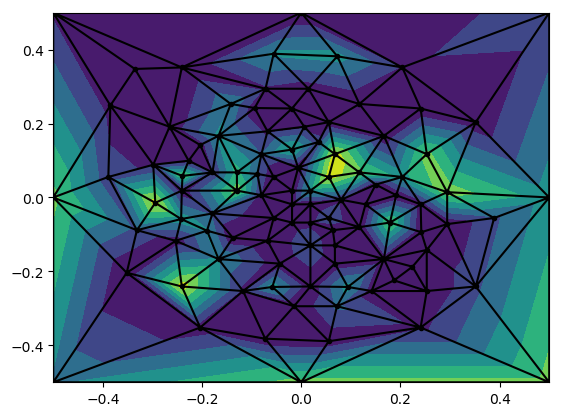

xi=(0.1111111111111111, -0.4074074074074074) yi=0.8366692276249634
xi=(0.4320987654320987, -1.765432098765432) yi=0.036755778101177944
xi=(0.0, -3.0) yi=0.00012340980408667956
xi=(-1.7901234567901234, 0.5308641975308641) yi=0.030612134793019028
xi=(-1.765432098765432, -0.08641975308641979) yi=0.04397126752890946
xi=(0.4362139917695474, 2.292181069958848) yi=0.004320532138545937
xi=(1.765432098765432, -0.4320987654320987) yi=0.036755778101177944
xi=(-0.4320987654320987, 1.765432098765432) yi=0.036755778101177944
xi=(0.3827160493827161, -0.5308641975308641) yi=0.6516234785998888
xi=(0.4074074074074074, -0.7777777777777777) yi=0.46258772366995615
xi=(-1.9876543209876543, -0.5308641975308642) yi=0.014514799484564337
xi=(-0.3497942386831276, -1.4526748971193415) yi=0.1072470351187447
xi=(-0.4362139917695474, -2.292181069958848) yi=0.004320532138545937
xi=(-1.4526748971193415, -0.3497942386831276) yi=0.1072470351187447
xi=(-0.1111111111111111, 0.1111111111111111) yi=0.9756109800648459
xi=(-1

In [3]:
#@everywhere f(p) = ((x,y)=p; exp(-(x^2 + y^2 - 0.75^2)^2/0.2^4))
@everywhere f(p) = exp(-p[1]^2 - p[2]^2)

learner = AdaptiveLearner2D([(-3,+3),(-3,+3)])
evaluate(f,learner,learner->length(learner.data)>=100)

fig = figure()

p,tri,v = learner.points, learner.vertices, learner.values

tricontourf(p[:,1],p[:,2],tri.-1,v)
triplot(p[:,1],p[:,2],tri.-1,"k.-")

show()